In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb


from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
                             classification_report, roc_auc_score, roc_curve)

from sklearn.model_selection import GridSearchCV


In [6]:
CARDdata = pd.read_excel('CARDdata.xlsx')
CARDdata.head(10)


,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners
5,5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master
6,6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master
7,7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master
8,8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa
9,9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa


### EDA: EXPLORATORY DATA ANALYSIS 

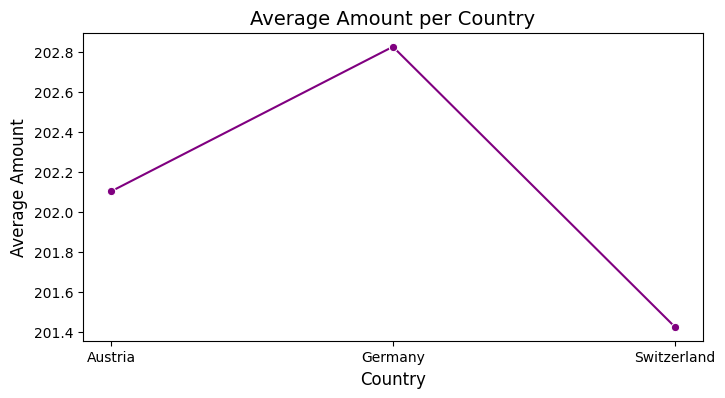

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by country; mean of the amount
k = CARDdata.groupby(['country'])['amount'].mean().reset_index()

# a line plot for the average amount by country
plt.figure(figsize=(8, 4))
sns.lineplot(x='country', y='amount', data=k, marker='o', color='purple')

# labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Amount', fontsize=12)
plt.title('Average Amount per Country', fontsize=14)

#  plot
plt.xticks(rotation=0)  
plt.show()


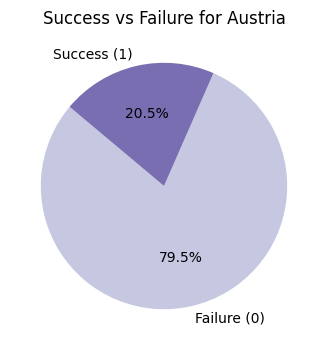

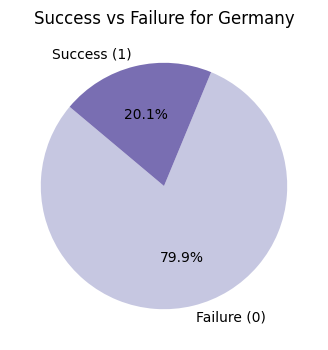

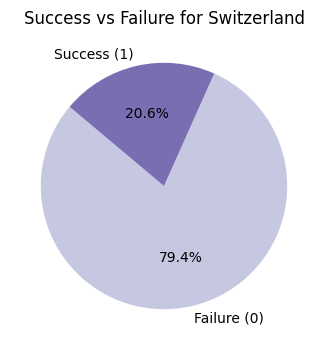

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by country and success and occurrences of 0 and 1
k = CARDdata.groupby(['country', 'success']).size().unstack(fill_value=0)

# pie chart for each country
for country in k.index:
    plt.figure(figsize=(4, 4))  
    
    plt.pie(k.loc[country], labels=['Failure (0)', 'Success (1)'], autopct='%1.1f%%', startangle=140, 
            colors=sns.color_palette("Purples", 2))
    plt.title(f"Success vs Failure for {country}")
    plt.show()


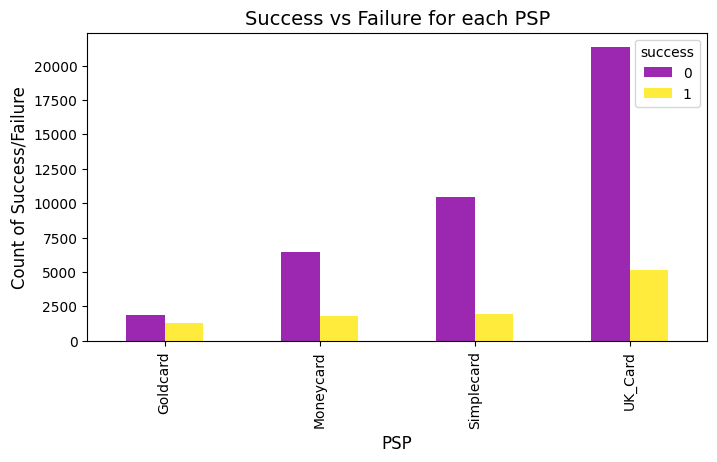

In [9]:

# Group by country and success and occurrences of 0 and 1
k = CARDdata.groupby(['PSP', 'success']).size().unstack(fill_value=0)

# bar chart
k.plot(kind='bar', stacked=False, color=['#9C27B0','#FFEB3B'], figsize=(8, 4))


plt.xlabel('PSP', fontsize=12)
plt.ylabel('Count of Success/Failure', fontsize=12)
plt.title('Success vs Failure for each PSP', fontsize=14)
plt.show()


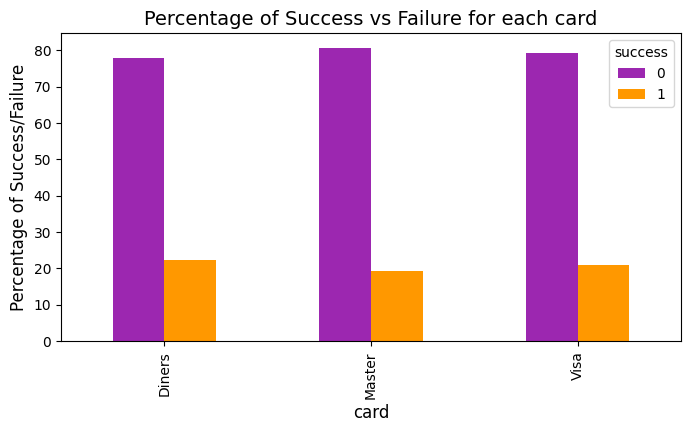

In [10]:
 

# Group by country and success and occurrences of 0 and 1
k = CARDdata.groupby(['card', 'success']).size().unstack(fill_value=0)

#percentage of success and failure for each country
k_percent = k.div(k.sum(axis=1), axis=0) * 100

# bar chart 
k_percent.plot(kind='bar', stacked=False,color= ['#9C27B0','#FF9800'], figsize=(8, 4))


plt.xlabel('card', fontsize=12)
plt.ylabel('Percentage of Success/Failure', fontsize=12)
plt.title('Percentage of Success vs Failure for each card', fontsize=14)
plt.show()


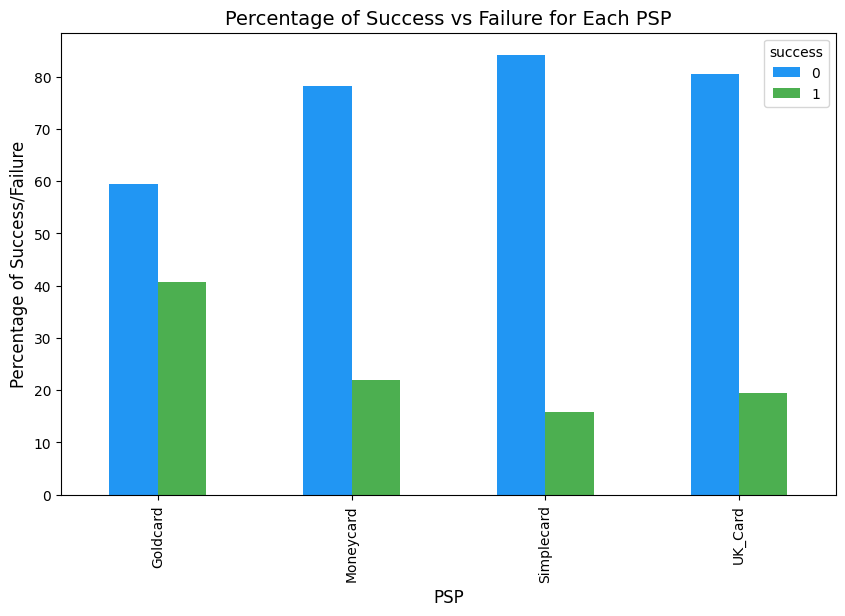

In [11]:

# Group by country and success and then counting occurrences of 0 and 1
k = CARDdata.groupby(['PSP', 'success']).size().unstack(fill_value=0)

#percentage of success and failure for each country
k_percent = k.div(k.sum(axis=1), axis=0) * 100

#bar chart 
k_percent.plot(kind='bar', stacked=False, color=['#2196F3', '#4CAF50'], figsize=(10, 6))

plt.xlabel('PSP', fontsize=12)
plt.ylabel('Percentage of Success/Failure', fontsize=12)
plt.title('Percentage of Success vs Failure for Each PSP', fontsize=14)
plt.show()


In [12]:
#checking if there is missing data in each feature
CARDdata.isnull().sum()

Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

In [13]:
#checking datatypes of columns
CARDdata.dtypes

Unnamed: 0             int64
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object

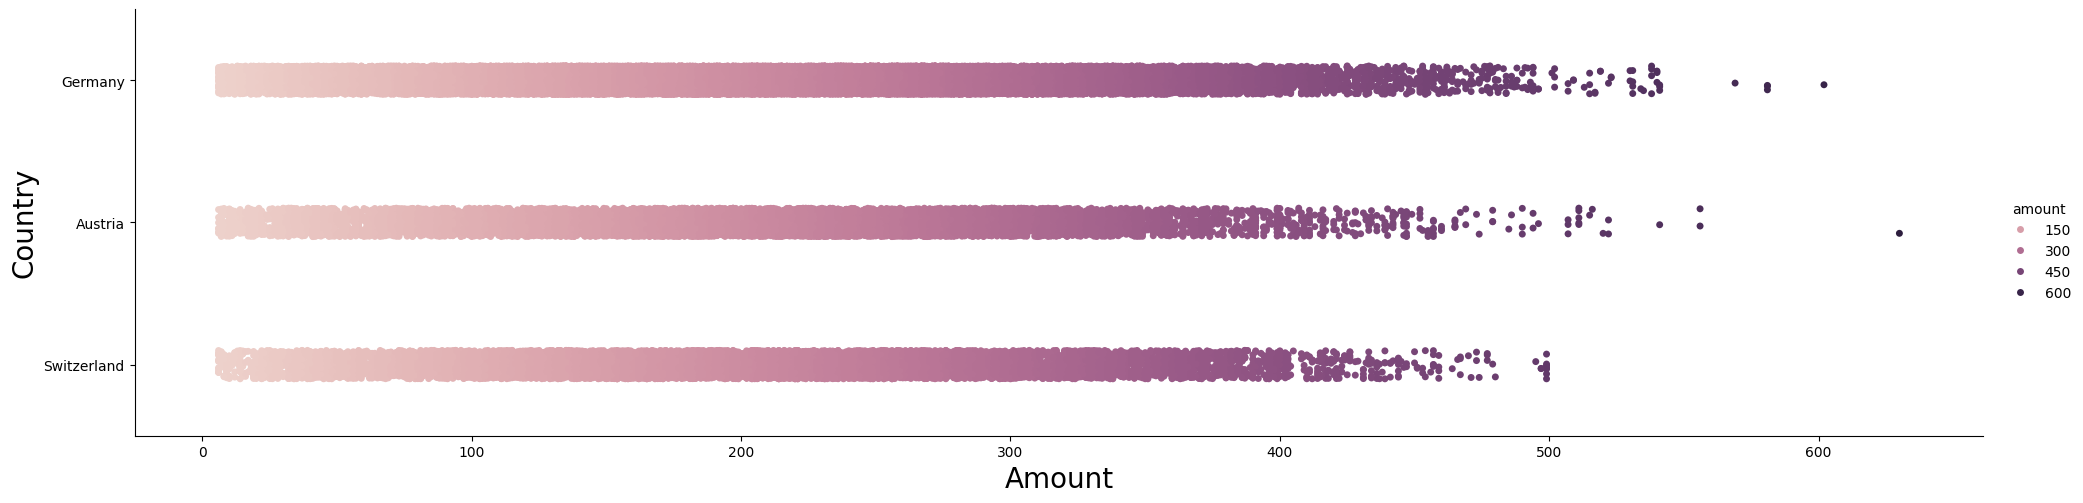

In [14]:
#  scatter point chart showing  correlation between amount and country, hue is amount
sns.catplot(y="country", x="amount", hue="amount", data=CARDdata, aspect = 4)
plt.xlabel("Amount",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.show()

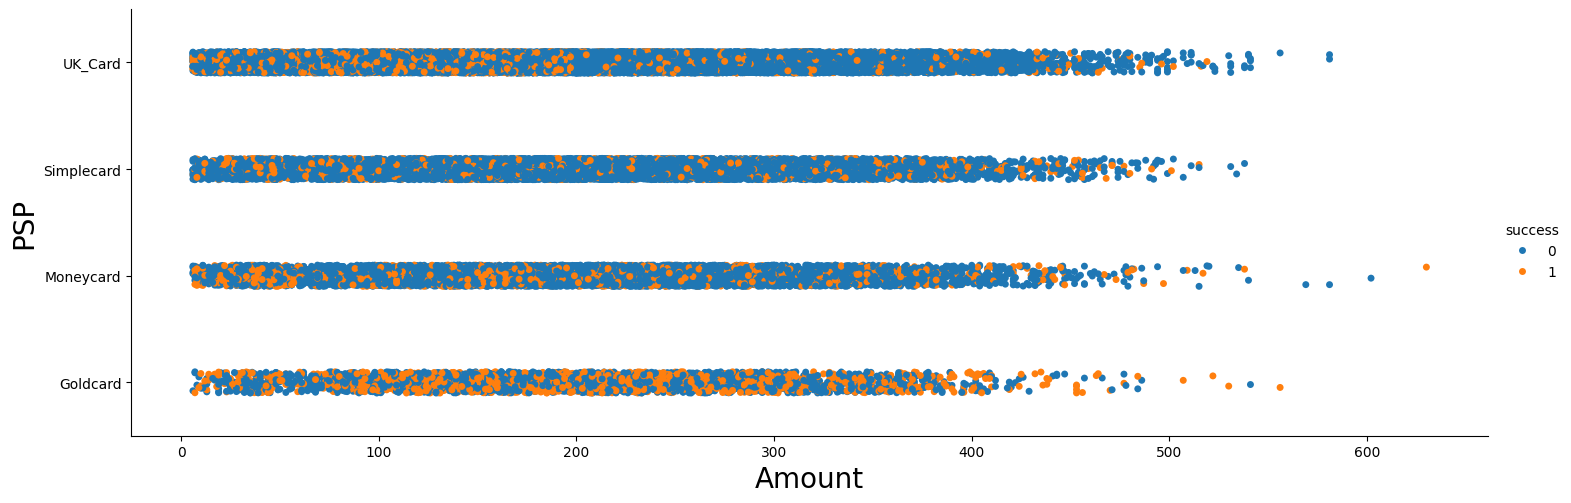

In [15]:
#  scatter point chart showing direct correlation between amount and PSP, hue is success
sns.catplot(y="PSP", x="amount", hue="success", data=CARDdata, aspect = 3)
plt.xlabel("Amount",fontsize=20)
plt.ylabel("PSP",fontsize=20)
plt.show()

### FEATURE ENGINEERING

In [16]:
#Unnamed:0 column dropping, because it just doubles order
CARDdata=CARDdata.drop(columns=['Unnamed: 0']) 

In [17]:
CARDdata.head(10)

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners
5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master
6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master
7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master
8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa
9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa


In [18]:
CARDdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  int64         
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  int64         
 6   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.7+ MB


In [19]:
#SOURCES:
#days of week; https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html
#0 iz Monday, 6 is Sunday
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html
#months; January 1, December 12
#hours of process: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html
#https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.minute.html, actually minutes passes,just to compare


In [20]:
CARDdata['days0to6'] = CARDdata['tmsp'].dt.dayofweek
CARDdata['months1to12'] = CARDdata['tmsp'].dt.month
CARDdata['hours0to24'] = CARDdata['tmsp'].dt.hour
CARDdata['minutes0to60'] = CARDdata['tmsp'].dt.minute
CARDdata.head(10)

,tmsp,country,amount,success,PSP,3D_secured,card,days0to6,months1to12,hours0to24,minutes0to60
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1,1,0,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,1,0,1
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1,1,0,2
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,1,0,3
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,1,0,4
5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master,1,1,0,6
6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master,1,1,0,7
7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master,1,1,0,8
8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa,1,1,0,9
9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa,1,1,0,10


In [21]:
#SOURCES:
# FROM THE TASK; 1.4 Additional Info from Business Side
# Many transactions fail at the first try. 
# Therefore, customers try several times to transfer the money. 
# If two transactions are within one minute, with the same amount of money and from the same country, 
# it is (for a decent number of tries) safe to assume that they are payment attempts of the same purchase. 
# Consider this possibility of several payment attempts of the same purchase in your machine learning model!

In [22]:
#https://www.geeksforgeeks.org/python-datetime-timedelta-function/
#timedelta between each row and the previous row
CARDdata['timedelta'] = CARDdata['tmsp'].diff()
CARDdata['timedelta'] = CARDdata['timedelta'].fillna(pd.Timedelta(0))
CARDdata['Attempts_Number'] = 1  # Start the new column with 1 in first row

#Loop through each row to apply the conditional logic
for i in range(1, len(CARDdata)):
    # if the timedelta between rows is less than or equal to 1 minute
    if CARDdata['timedelta'].iloc[i] <= pd.Timedelta('1 minute'):
        # If country and amount features values are the same as the previous row, raise for 1 the value of attempts number
        if (CARDdata['country'].iloc[i] == CARDdata['country'].iloc[i-1]) and (CARDdata['amount'].iloc[i] == CARDdata['amount'].iloc[i-1]):
            CARDdata.at[i, 'Attempts_Number'] = CARDdata['Attempts_Number'].iloc[i-1] + 1
        else:
            # If country and amount is not the same in new row, reset the value to 1
            CARDdata.at[i, 'Attempts_Number'] = 1
    else:
        # If the timedelta is bigger then 1 minute, reset the value of Attempts Number to 1
        CARDdata.at[i, 'Attempts_Number'] = 1
 
CARDdata.head(15)

,tmsp,country,amount,success,PSP,3D_secured,card,days0to6,months1to12,hours0to24,minutes0to60,timedelta,Attempts_Number
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1,1,0,1,0 days 00:00:00,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,1,0,1,0 days 00:00:06,2
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1,1,0,2,0 days 00:01:32,1
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,1,0,3,0 days 00:00:24,2
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,1,0,4,0 days 00:01:20,1
5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master,1,1,0,6,0 days 00:02:08,1
6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master,1,1,0,7,0 days 00:00:38,2
7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master,1,1,0,8,0 days 00:01:27,1
8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa,1,1,0,9,0 days 00:01:10,1
9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa,1,1,0,10,0 days 00:00:53,2


In [23]:
#comments on column I am adding 
# Task: 1.2 List of PSPs (=payments service providers) and service fees,
# filling Fee_amount for the visualization and showing the additional info of the Task, but the value of fee amount together with 
# PSP type is directly affects Success or Failure value
# so i will not use the fee value among features for prediction; also because this is the only value that in business model we cannot know and 
# decide in advance, since we don't know if the transaction will fail or succeed.  We can try on different PSPs, choose the amount, date, time,
# country, werather there is or not 3D security and also choose the attempt number. We can use fee amount for ML model and choose the 
# PSP within cost and success best ratio, as in the end of this programme, as a general recommendation to the company for us.
# But if we create an application where we can fill known features and predict success, fee amount cannot be known in advance for the row of values
# in prediction.


In [24]:
CARDdata['Fee_amount'] = None 

for i in range(len(CARDdata)):
    if CARDdata['PSP'].iloc[i] == 'Moneycard':
        if CARDdata['success'].iloc[i] == 1:
            CARDdata.at[i, 'Fee_amount'] = 5
        elif CARDdata['success'].iloc[i] == 0:
            CARDdata.at[i, 'Fee_amount'] = 2
    elif CARDdata['PSP'].iloc[i] == 'Goldcard':
        if CARDdata['success'].iloc[i] == 1:
            CARDdata.at[i, 'Fee_amount'] = 10
        elif CARDdata['success'].iloc[i] == 0:
            CARDdata.at[i, 'Fee_amount'] = 5
    elif CARDdata['PSP'].iloc[i] == 'UK_Card':
        if CARDdata['success'].iloc[i] == 1:
            CARDdata.at[i, 'Fee_amount'] = 3
        elif CARDdata['success'].iloc[i] == 0:
            CARDdata.at[i, 'Fee_amount'] = 1
    elif CARDdata['PSP'].iloc[i] == 'Simplecard':
        if CARDdata['success'].iloc[i] == 1:
            CARDdata.at[i, 'Fee_amount'] = 1
        elif CARDdata['success'].iloc[i] == 0:
            CARDdata.at[i, 'Fee_amount'] = 0.5


CARDdata.head(20)

,tmsp,country,amount,success,PSP,3D_secured,card,days0to6,months1to12,hours0to24,minutes0to60,timedelta,Attempts_Number,Fee_amount
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1,1,0,1,0 days 00:00:00,1,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,1,0,1,0 days 00:00:06,2,3
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1,1,0,2,0 days 00:01:32,1,1
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,1,0,3,0 days 00:00:24,2,3
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,1,0,4,0 days 00:01:20,1,0.5
5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master,1,1,0,6,0 days 00:02:08,1,1
6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master,1,1,0,7,0 days 00:00:38,2,0.5
7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master,1,1,0,8,0 days 00:01:27,1,3
8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa,1,1,0,9,0 days 00:01:10,1,0.5
9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa,1,1,0,10,0 days 00:00:53,2,0.5


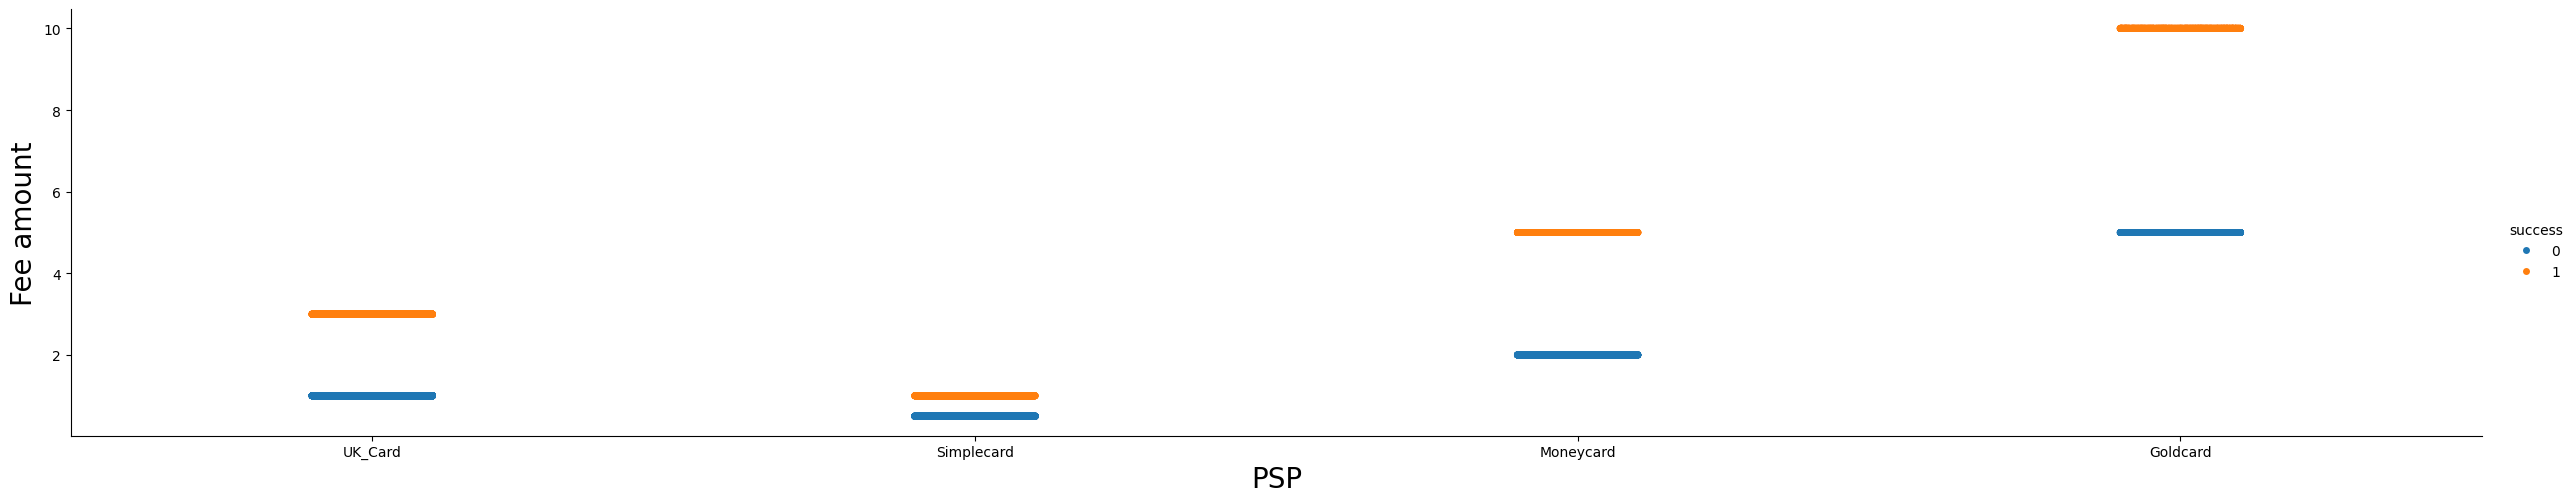

In [25]:
#  scatter point chart showing correlation between fee amount and PSP, hue is success 
sns.catplot(y="Fee_amount", x="PSP", hue="success", data=CARDdata, aspect = 5)
plt.xlabel("PSP",fontsize=20)
plt.ylabel("Fee amount",fontsize=20)
plt.show()

### FEATURE CORRELATION AND SELECTION

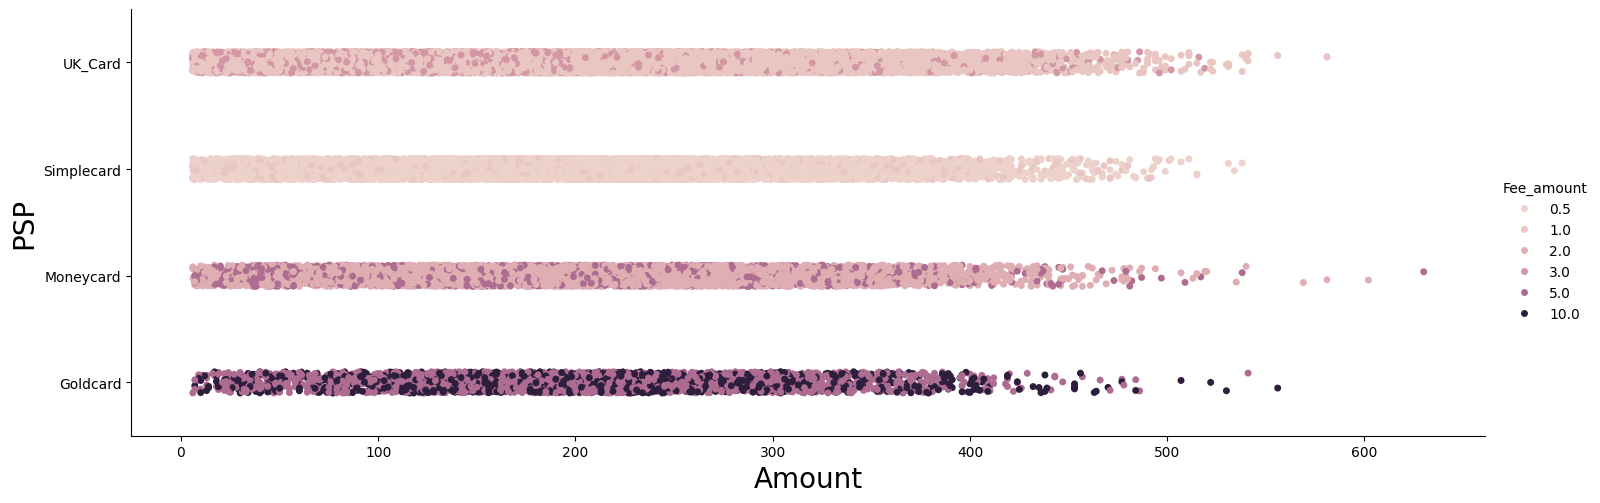

In [26]:



#FEE AMOUNTS HIGHEST FOR GOLDCARD EVEN THOUGH IT HAS MOST OFTEN SUCCESS ABOVE 
####feature correlation, WITH PSP, BECAUSE I EXCLUDE CATEGORICAL COLUMNS FOR LATER CORRELATION MATRIX, LIKE PSP,COUNTRY ETC.
###SHOWING HERE JUST AFTER FEATURE ENGINEERING TO VISUALIZE FEE AMOUNT CONNECTED TO TYPES OF PSPs
#scatter point chart showing correlation between PSP and Amount, hue is Fee_amount
sns.catplot(y="PSP", x="amount", hue="Fee_amount", data=CARDdata, aspect = 3)
plt.xlabel("Amount",fontsize=20)
plt.ylabel("PSP",fontsize=20)
plt.show()

<Figure size 1200x800 with 0 Axes>

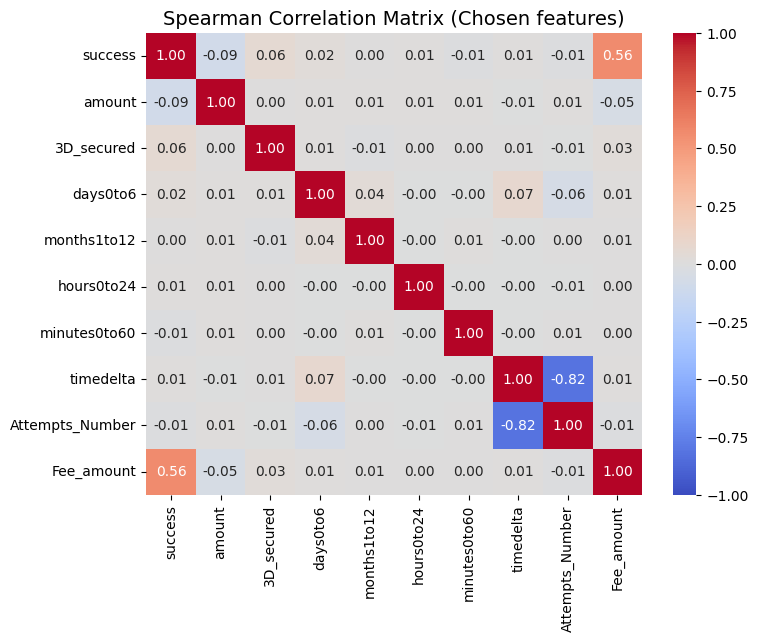

In [27]:
# Selecting the columns
selected_columns = ['success', 'amount', '3D_secured','days0to6','months1to12','hours0to24','minutes0to60','timedelta','Attempts_Number','Fee_amount']
# new colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Setting the figure size
plt.figure(figsize=(12, 8))  # Adjust the size here (width, height)

# Calculating the correlation matrix for the selected columns
correlation_matrix = CARDdata[selected_columns].corr(method='spearman')

 
plt.figure(figsize=(8, 6))

# correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', center=0, vmin=-1, vmax=1)

plt.title('Spearman Correlation Matrix (Chosen features)', fontsize=14)
plt.show()

#shows that success fee amount with PSP correlation and timedelta with attempts number correlation are high,
#because attempts number is made out of timedelta



In [28]:
CARDdata=CARDdata.drop(columns=['timedelta']) 
CARDdata.head(10)
#attempts number column values are made out of timedelta

,tmsp,country,amount,success,PSP,3D_secured,card,days0to6,months1to12,hours0to24,minutes0to60,Attempts_Number,Fee_amount
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1,1,0,1,1,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,1,0,1,2,3
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1,1,0,2,1,1
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,1,0,3,2,3
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,1,0,4,1,0.5
5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master,1,1,0,6,1,1
6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master,1,1,0,7,2,0.5
7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master,1,1,0,8,1,3
8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa,1,1,0,9,1,0.5
9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa,1,1,0,10,2,0.5


In [29]:
CARDdata.shape

(50410, 13)

In [30]:
#one hot encoding for categorical features
#https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial

CARDdata_encoded = pd.get_dummies(CARDdata[['country', 'PSP', 'card']], dtype=int) 
CARDdata_encoded.head()

,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa
0,0,1,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,1,1,0,0
4,1,0,0,0,0,1,0,1,0,0


In [31]:
CARDdatanew = pd.concat([CARDdata, CARDdata_encoded], axis=1)
CARDdatanew.head()

,tmsp,country,amount,success,PSP,3D_secured,card,days0to6,months1to12,hours0to24,...,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,1,0,...,0,1,0,0,0,0,1,1,0,0
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,1,0,...,1,0,0,0,0,1,0,1,0,0


In [32]:
CARDdatanew.shape

(50410, 23)

In [33]:
#dropping double meaning columns: country, PSP and card, because of one hot encoding in other columns
CARDdatanew=CARDdatanew.drop(columns=['country', 'PSP', 'card']) 
CARDdatanew.head()

,tmsp,amount,success,3D_secured,days0to6,months1to12,hours0to24,minutes0to60,Attempts_Number,Fee_amount,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa
0,2019-01-01 00:01:11,89,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1
1,2019-01-01 00:01:17,89,1,0,1,1,0,1,2,3,0,1,0,0,0,0,1,0,0,1
2,2019-01-01 00:02:49,238,0,1,1,1,0,2,1,1,0,1,0,0,0,0,1,1,0,0
3,2019-01-01 00:03:13,238,1,1,1,1,0,3,2,3,0,1,0,0,0,0,1,1,0,0
4,2019-01-01 00:04:33,124,0,0,1,1,0,4,1,0.5,1,0,0,0,0,1,0,1,0,0


In [34]:
CARDdatanew.shape

(50410, 20)

In [35]:
CARDdatanew.dtypes


tmsp                   datetime64[ns]
amount                          int64
success                         int64
3D_secured                      int64
days0to6                        int32
months1to12                     int32
hours0to24                      int32
minutes0to60                    int32
Attempts_Number                 int64
Fee_amount                     object
country_Austria                 int32
country_Germany                 int32
country_Switzerland             int32
PSP_Goldcard                    int32
PSP_Moneycard                   int32
PSP_Simplecard                  int32
PSP_UK_Card                     int32
card_Diners                     int32
card_Master                     int32
card_Visa                       int32
dtype: object

In [36]:
#converting Fee_amount to int

CARDdatanew['Fee_amount'] = CARDdatanew['Fee_amount'].fillna(0).astype(int)
CARDdatanew.dtypes

C:\Users\kates\AppData\Local\Temp\ipykernel_13460\4229027056.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CARDdatanew['Fee_amount'] = CARDdatanew['Fee_amount'].fillna(0).astype(int)


tmsp                   datetime64[ns]
amount                          int64
success                         int64
3D_secured                      int64
days0to6                        int32
months1to12                     int32
hours0to24                      int32
minutes0to60                    int32
Attempts_Number                 int64
Fee_amount                      int32
country_Austria                 int32
country_Germany                 int32
country_Switzerland             int32
PSP_Goldcard                    int32
PSP_Moneycard                   int32
PSP_Simplecard                  int32
PSP_UK_Card                     int32
card_Diners                     int32
card_Master                     int32
card_Visa                       int32
dtype: object

In [37]:
CARDdatanew.isnull().sum()

tmsp                   0
amount                 0
success                0
3D_secured             0
days0to6               0
months1to12            0
hours0to24             0
minutes0to60           0
Attempts_Number        0
Fee_amount             0
country_Austria        0
country_Germany        0
country_Switzerland    0
PSP_Goldcard           0
PSP_Moneycard          0
PSP_Simplecard         0
PSP_UK_Card            0
card_Diners            0
card_Master            0
card_Visa              0
dtype: int64

In [38]:
#dropping tmsp, because other time and date columns are in direct correlation to this one
#dropping Fee_amount, because it comes from PSP and success column value, so it shouldn't affect the columns success value as a model feature 

CARDdatanew=CARDdatanew.drop(columns=['tmsp','Fee_amount']) 
CARDdatanew.head()

,amount,success,3D_secured,days0to6,months1to12,hours0to24,minutes0to60,Attempts_Number,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa
0,89,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1
1,89,1,0,1,1,0,1,2,0,1,0,0,0,0,1,0,0,1
2,238,0,1,1,1,0,2,1,0,1,0,0,0,0,1,1,0,0
3,238,1,1,1,1,0,3,2,0,1,0,0,0,0,1,1,0,0
4,124,0,0,1,1,0,4,1,1,0,0,0,0,1,0,1,0,0


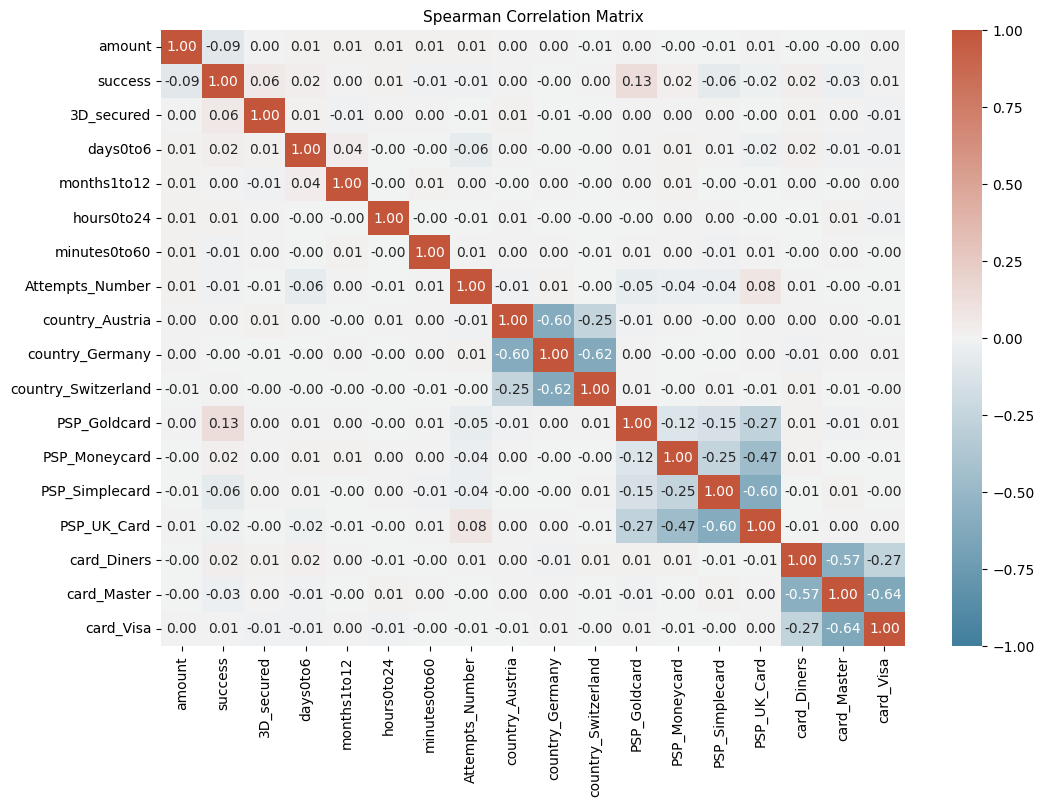

In [39]:

#re-check
# colormap 
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Set the figure size for better visibility
plt.figure(figsize=(12, 8))  # Adjust the size here (width, height)

#correlation matrix 
sns.heatmap(CARDdatanew.corr(method='spearman'), cmap=cmap, vmin=-1, vmax=1, annot=True, fmt='.2f', center=0)
plt.title('Spearman Correlation Matrix', fontsize=11)
plt.show()

### DATA SPLIT

In [40]:
#https://medium.com/@megha.natarajan/scaling-data-before-or-after-train-test-split-35e9a9a7453f
#SPLIT THEN SCALE

y=CARDdatanew['success']
X=CARDdatanew.drop(columns=['success']) 

In [41]:
X.head()

,amount,3D_secured,days0to6,months1to12,hours0to24,minutes0to60,Attempts_Number,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa
0,89,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1
1,89,0,1,1,0,1,2,0,1,0,0,0,0,1,0,0,1
2,238,1,1,1,0,2,1,0,1,0,0,0,0,1,1,0,0
3,238,1,1,1,0,3,2,0,1,0,0,0,0,1,1,0,0
4,124,0,1,1,0,4,1,1,0,0,0,0,1,0,1,0,0


In [42]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: success, dtype: int64

In [43]:

#https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)
 

In [44]:
X_train.shape

(35287, 17)

In [45]:
X_test.shape

(15123, 17)

In [46]:
 y_train.shape

(35287,)

In [47]:
y_test.shape

(15123,)

In [48]:
#checked if trains in X and y are same size and tests in X and y

### DATA TRANSFORMATION

In [49]:
#standard scaler on chosen features in X part
#https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['amount', 'days0to6', 'months1to12', 'hours0to24', 'minutes0to60']] = scaler.fit_transform(X_train[['amount', 'days0to6', 'months1to12', 'hours0to24', 'minutes0to60']])
X_test[['amount', 'days0to6', 'months1to12', 'hours0to24', 'minutes0to60']] = scaler.transform(X_test[['amount', 'days0to6', 'months1to12', 'hours0to24', 'minutes0to60']])
 

### BASELINE MODEL

##### MODELS AND EVALUATION

Predictions for Logistic Regression:
       Predicted Success
5087                   0
22530                  0
15518                  0
3418                   0
36168                  0
...                  ...
26842                  0
16366                  0
17979                  0
25224                  0
32048                  0

[15123 rows x 1 columns]
Model: Logistic Regression
Accuracy: 0.8061
Precision: 0.5510
Recall: 0.0183
F1 Score: 0.0355
Confusion Matrix:
[[12136    44]
 [ 2889    54]]
ROC AUC Score: 0.6211
Classification report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     12180
           1       0.55      0.02      0.04      2943

    accuracy                           0.81     15123
   macro avg       0.68      0.51      0.46     15123
weighted avg       0.76      0.81      0.73     15123

------------------------------------------------------------
Predictions for k-Nearest Neighbors:
       Predicted Success

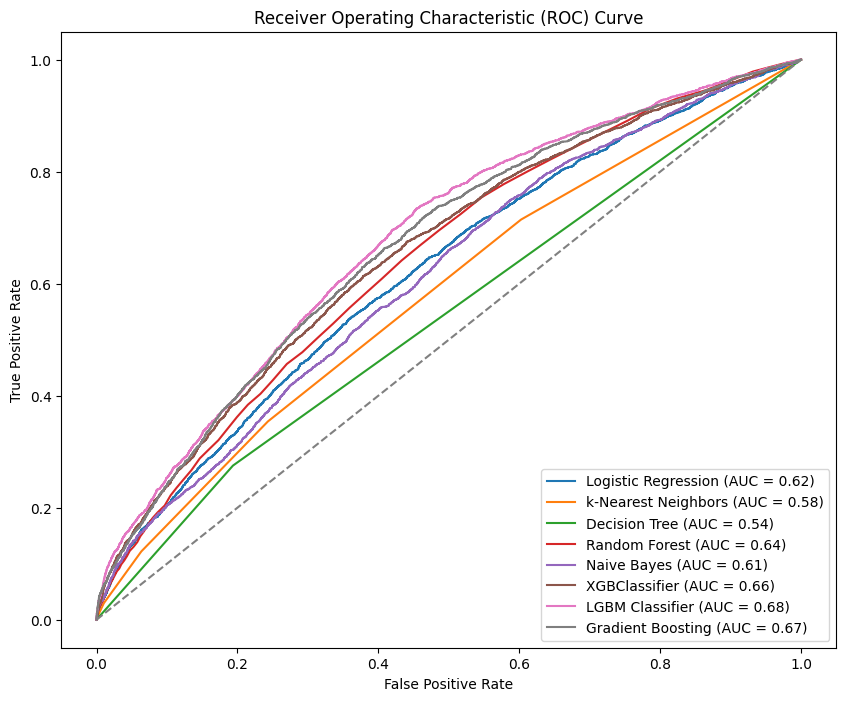

In [50]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Dictionary 
models = {
    "Logistic Regression": LogisticRegression(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBClassifier": XGBClassifier(),
    "LGBM Classifier": lgb.LGBMClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Initialize plot for ROC curves
plt.figure(figsize=(10, 8))

# Loop through each model, train it and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC


####Adding predicted results to a new column in X_test DataFrame
    X_test_copy = X_test.copy()  # Copying X_test to avoid modifying original data
    X_test_copy['Predicted Success'] = y_pred  # Adding predicted labels (0 or 1) as a new column

    # DataFrame with predicted results for each row
    print(f"Predictions for {model_name}:")
    print(X_test_copy[['Predicted Success']])  
    
    
    # Calculate accuracy, precision, recall, f1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
   
    # ROC AUC score and ROC Curve
    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # evaluation metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"ROC AUC Score: {auc:.4f}")
    print(f"Classification report:\n{classification_report(y_test, y_pred)}")
    print("-" * 60)
    
# Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### MODEL TUNING

##### MODEL AND EVALUATION

In [51]:
#MODEL TUNING
#ONE OF THE BEST ACCURACIES ABOVE

In [53]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier



#parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# LGBMClassifier
lgbm = LGBMClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           scoring='accuracy',  
                           n_jobs=-1,            
                           cv=3,                
                           verbose=2)          

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

#best parameters and the best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters Found: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: ", grid_search.best_score_)

# Training a new model with the best parameters found
best_lgbm = LGBMClassifier(**best_parameters)
best_lgbm.fit(X_train, y_train)

# Evaluate the model with test set
y_pred = best_lgbm.predict(X_test)
y_proba = best_lgbm.predict_proba(X_test)[:, 1]  


######Adding predicted results to a new column in X_test DataFrame
X_test_copy1 = X_test.copy()  # Copying X_test to avoid modifying original data
X_test_copy1['Predicted Success'] = y_pred  # Adding predicted labels (0 or 1) as a new column

# DataFrame with predicted results for each row
print(f"Predictions for {model_name}:")
print(X_test_copy[['Predicted Success']])  # only new column with predictions
    



# evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Classification report 
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
[LightGBM] [Info] Number of positive: 7285, number of negative: 28002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 35287, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.206450 -> initscore=-1.346458
[LightGBM] [Info] Start training from score -1.346458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters Found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 50, 'num_leaves': 50, 'subsample': 0.8}
Best Cross-Validation Accuracy:  0.7979142264411427
[LightGB

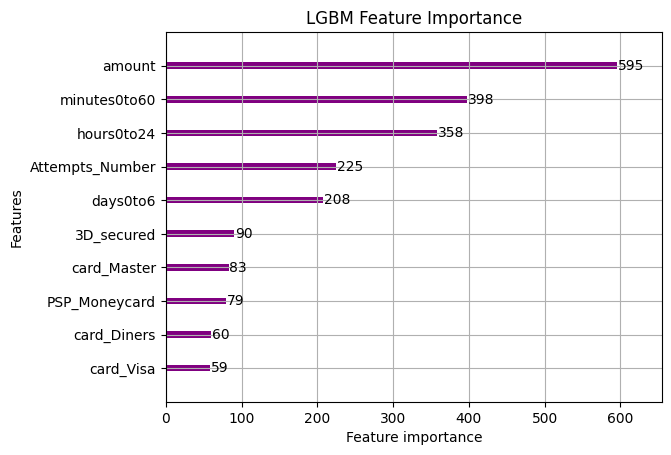

In [54]:
# Feature Importance Plot
import lightgbm as lgb

# Plot feature importance for the best model
lgb.plot_importance(best_lgbm, max_num_features=10, importance_type='split', color='purple')
plt.title('LGBM Feature Importance')
plt.show()



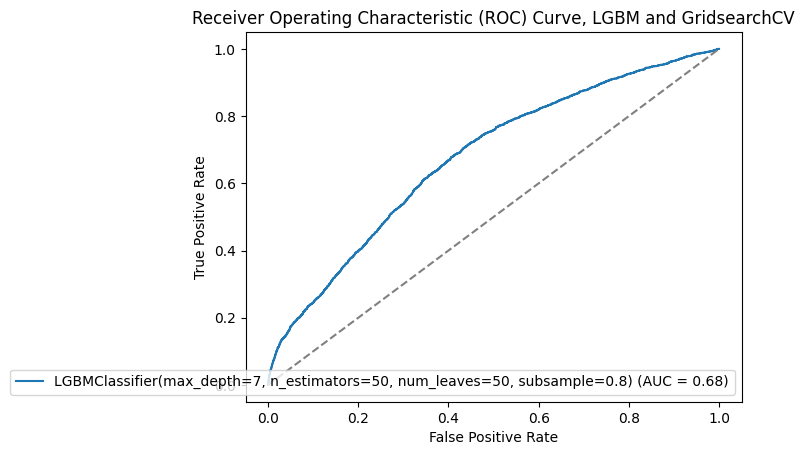

In [55]:
# ROC AUC score and ROC Curve
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# ROC AUC score and ROC Curve
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    

#Plot ROC curve
plt.plot(fpr, tpr, label=f'{best_lgbm} (AUC = {auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, LGBM and GridsearchCV')
plt.legend(loc='lower right')
plt.show()

### PROPOSAL OF ML MODEL REAL-LIFE BUSINESS IMPLEMENTATION; 1ST EXAMPLE

In [56]:
CARDdata.head()

,tmsp,country,amount,success,PSP,3D_secured,card,days0to6,months1to12,hours0to24,minutes0to60,Attempts_Number,Fee_amount
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1,1,0,1,1,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,1,0,1,2,3
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1,1,0,2,1,1
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,1,0,3,2,3
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,1,0,4,1,0.5


In [57]:

df = pd.DataFrame(CARDdata)

# Group by 'Category' and calculate counts of 1s and 0s in 'Success'
result = df.groupby('PSP')['success'].value_counts().unstack(fill_value=0)

# Calculate the percentage of 1s and 0s for each category
result['Percentage_1'] = result[1] / (result[1] + result[0]) * 100
result['Percentage_0'] = result[0] / (result[1] + result[0]) * 100

# Display the results
print(result)

success         0     1  Percentage_1  Percentage_0
PSP                                                
Goldcard     1905  1303     40.617207     59.382793
Moneycard    6482  1815     21.875377     78.124623
Simplecard  10478  1968     15.812309     84.187691
UK_Card     21317  5142     19.433841     80.566159


In [58]:
# Group by 'Category' and calculate counts of 1s and 0s in 'Success'
result = CARDdata.groupby('PSP')['success'].value_counts().unstack(fill_value=0)

# Calculate the number of 1s and 0s for each category
result['Percentage_1'] = result[1] / (result[1] + result[0]) 
result['Percentage_0'] = result[0] / (result[1] + result[0]) 
 
print(result)

success         0     1  Percentage_1  Percentage_0
PSP                                                
Goldcard     1905  1303      0.406172      0.593828
Moneycard    6482  1815      0.218754      0.781246
Simplecard  10478  1968      0.158123      0.841877
UK_Card     21317  5142      0.194338      0.805662


In [59]:
# for all of successes; success cost=all costs (successes costs+fails costs)
# 1 success= all costs (successes costs+fails costs)/all the number of successes 
#the lowest number of cost per success is Simplecard; lower

#Goldcard
#1303= (1905*5+1303*10)
Goldcard=(1905*5+1303*10)/1303
print(Goldcard)

17.310053722179585


In [60]:
#Moneycard
#1815= (6482*2+1815*5)
Moneycard=(6482*2+1815*5)/1815
print(Moneycard)

12.142699724517906


In [61]:
#Simplecard
#1968= (10478*0.5+1968*1)
Simplecard=(10478*0.5+1968*1)/1968
print(Simplecard)

3.6620934959349594


In [62]:
#UK_card
#5142= (21317*1+5142*3)
UK_card=(21317*1+5142*3)/5142
print(UK_card)

7.145663166083236



### PROPOSAL OF REAL-LIFE ML MODEL IMPLEMENTATION; 2ND EXAMPLE, FOR EACH TRANSACTION

In [63]:

#using data I have prepared in my example tables, just to test the results 
#success here is a predicted column, as above in model where I copied the prediction results in separate column
#to be able to print it or to manipulate with it, without ruining the model

In [64]:
IMPLEMENTdata = pd.read_excel('PSP_implementation.xlsx')

IMPLEMENTdata.head(20)

,tmsp,country,amount,PSP,3D_secured,card,attempt,success
0,2019-01-01 00:12:15,Austria,232,Simplecard,1,Diners,1,0
1,2019-01-02 00:12:15,Austria,232,Simplecard,1,Diners,2,0
2,2019-01-03 00:12:15,Austria,232,Simplecard,1,Diners,3,1
3,2019-01-04 00:12:15,Austria,232,Simplecard,1,Diners,4,0
4,2019-01-05 00:12:15,Austria,232,Simplecard,1,Diners,5,1
5,2019-01-06 00:12:15,Austria,232,Moneycard,1,Diners,1,0
6,2019-01-07 00:12:15,Austria,232,Moneycard,1,Diners,2,1
7,2019-01-08 00:12:15,Austria,232,Moneycard,1,Diners,3,0
8,2019-01-09 00:12:15,Austria,232,Moneycard,1,Diners,4,0
9,2019-01-10 00:12:15,Austria,232,Moneycard,1,Diners,5,0


In [65]:
# a code that takes smallest fee
df = pd.DataFrame(IMPLEMENTdata)

# PSP success and failure fee structure
fee_structure = {
    'Moneycard': {'successfee': 5, 'failurefee': 2}, 
    'Goldcard': {'successfee': 10, 'failurefee': 5}, 
    'UK_Card': {'successfee': 3, 'failurefee': 1}, 
    'Simplecard': {'successfee': 1, 'failurefee': 0.5} 
}

#  a new column to hold the fee sum for each row
def calculate_fees(row, fee_structure):
    psp = row['PSP']
    success = row['success']
    attempt = row['attempt']
    
    # fee structure for the current PSP
    successfee = fee_structure[psp]['successfee'] 
    failurefee = fee_structure[psp]['failurefee'] 
    
    # success or failure fee
    if success == 1:
        return successfee 
    else:
        return failurefee 

df['fee'] = df.apply(lambda row: calculate_fees(row, fee_structure), axis=1)

# Group by PSP and calculating total fee until the first success
def calculate_total_fee_for_psp(psp_data):
    total_fee = 0
    for idx, row in psp_data.iterrows():
        total_fee += row['fee']
        if row['success'] == 1:
            break
    return total_fee

# Applying fee calculation to each PSP group
psp_sums = df.groupby('PSP').apply(calculate_total_fee_for_psp)
 

# Now we have the total fee sum for each PSP
# Finding the PSP with the lowest sum of fees
best_psp = psp_sums.idxmin()
best_psp_fee = psp_sums.min()

print(f"The PSP with the lowest fee is: {best_psp} with a total fee of {best_psp_fee}")


The PSP with the lowest fee is: Simplecard with a total fee of 2.0


C:\Users\kates\AppData\Local\Temp\ipykernel_13460\498946861.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  psp_sums = df.groupby('PSP').apply(calculate_total_fee_for_psp)


In [66]:
IMPLEMENTdata2 = pd.read_excel('PSP_implementation2.xlsx')

IMPLEMENTdata2.head(20)

,tmsp,country,amount,PSP,3D_secured,card,attempt,success
0,2019-01-01 00:12:15,Austria,232,Simplecard,1,Diners,1,0
1,2019-01-02 00:12:15,Austria,232,Simplecard,1,Diners,2,0
2,2019-01-03 00:12:15,Austria,232,Simplecard,1,Diners,3,0
3,2019-01-04 00:12:15,Austria,232,Simplecard,1,Diners,4,0
4,2019-01-05 00:12:15,Austria,232,Simplecard,1,Diners,5,1
5,2019-01-06 00:12:15,Austria,232,Moneycard,1,Diners,1,0
6,2019-01-07 00:12:15,Austria,232,Moneycard,1,Diners,2,1
7,2019-01-08 00:12:15,Austria,232,Moneycard,1,Diners,3,0
8,2019-01-09 00:12:15,Austria,232,Moneycard,1,Diners,4,0
9,2019-01-10 00:12:15,Austria,232,Moneycard,1,Diners,5,0


In [67]:
#a code that takes smallest fee sum and if some PSP has the same amount as another, take one with less number of attempts
# 'PSP' legend: 
# 'Simplecard'=1  
# 'Moneycard'=2  
# 'Goldcard'=3  
# 'UK_Card'=4  
 
 
# to check result

df = pd.DataFrame(IMPLEMENTdata2)

# PSP success and failure fee structure
fee_structure = {
    'Moneycard': {'successfee': 5, 'failurefee': 2},
    'Goldcard': {'successfee': 10, 'failurefee': 5},
    'UK_Card': {'successfee': 3, 'failurefee': 1},
    'Simplecard': {'successfee': 1, 'failurefee': 0.5}
}

# new column to hold the fee sum for each row
def calculate_fees(row, fee_structure):
    psp = row['PSP']
    success = row['success']
    
    #  fee structure for the current PSP
    successfee = fee_structure[psp]['successfee']
    failurefee = fee_structure[psp]['failurefee']
    
    #  success or failure fee
    if success == 1:
        return successfee
    else:
        return failurefee

# Adding fee column to the DataFrame
df['fee'] = df.apply(lambda row: calculate_fees(row, fee_structure), axis=1)

# Group by PSP and calculating total fee until the first success and track the number of attempts
def calculate_total_fee_for_psp(psp_data):
    total_fee = 0
    attempts = 0  # To track the number of attempts until the first success
    for idx, row in psp_data.iterrows():
        total_fee += row['fee']
        attempts += 1
        if row['success'] == 1:
            break  # when first success is found
    return total_fee, attempts  # Return total fee and number of attempts

# Apply the fee calculation to each PSP group
psp_sums = df.groupby('PSP').apply(calculate_total_fee_for_psp)

# Convert the result into a DataFrame for easier handling
psp_sums_df = pd.DataFrame(psp_sums.tolist(), columns=['total_fee', 'attempts'])

# Reset the index to make 'PSP' a column again and ensure it's properly handled
psp_sums_df.reset_index(inplace=True)

# Ensure column names are correct
psp_sums_df.columns = ['PSP', 'total_fee', 'attempts']

# Sort first by total fee and in case of same amount of more of them, by the number of attempts (ascending)
psp_sums_df = psp_sums_df.sort_values(by=['total_fee', 'attempts'])

# Now get the PSP with the lowest total fee and if tied the fewest attempts
best_psp = psp_sums_df['PSP'].iloc[0]
best_psp_fee = psp_sums_df['total_fee'].iloc[0]
best_psp_attempts = psp_sums_df['attempts'].iloc[0]

# Output the result
print(f"The PSP with the lowest fee is: {best_psp} with a total fee of {best_psp_fee} and {best_psp_attempts} attempts.")


The PSP with the lowest fee is: 3 with a total fee of 3.0 and 1 attempts.


C:\Users\kates\AppData\Local\Temp\ipykernel_13460\4066694431.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  psp_sums = df.groupby('PSP').apply(calculate_total_fee_for_psp)


In [68]:
#for the GUI and message to the user

df = pd.DataFrame(IMPLEMENTdata2)

# PSP success and failure fee structure
fee_structure = {
    'Moneycard': {'successfee': 5, 'failurefee': 2},
    'Goldcard': {'successfee': 10, 'failurefee': 5},
    'UK_Card': {'successfee': 3, 'failurefee': 1},
    'Simplecard': {'successfee': 1, 'failurefee': 0.5}
}

# Create a new column to hold the fee sum for each row
def calculate_fees(row, fee_structure):
    psp = row['PSP']
    success = row['success']
    
    #fee structure for the current PSP
    successfee = fee_structure[psp]['successfee']
    failurefee = fee_structure[psp]['failurefee']
    
    #success or failure fee
    if success == 1:
        return successfee
    else:
        return failurefee

# Adding fee column to the DataFrame
df['fee'] = df.apply(lambda row: calculate_fees(row, fee_structure), axis=1)

# Group by PSP and calculate the total fee until the first success, and track the number of attempts
def calculate_total_fee_for_psp(psp_data):
    total_fee = 0
    attempts = 0  # To track the number of attempts until the first success
    for idx, row in psp_data.iterrows():
        total_fee += row['fee']
        attempts += 1
        if row['success'] == 1:
            break  # Stop adding fees when first success is found
    return total_fee, attempts  # total fee and number of attempts

# fee calculation to each PSP group
psp_sums = df.groupby('PSP').apply(calculate_total_fee_for_psp)

# result into a DataFrame
psp_sums_df = pd.DataFrame(psp_sums.tolist(), columns=['total_fee', 'attempts'])

# Reset the index to make 'PSP' a column again and ensure it's properly handled
psp_sums_df.reset_index(inplace=True)

# column names are
psp_sums_df.columns = ['PSP', 'total_fee', 'attempts']

# Sort first by total fee and in case of same value with some other, by the number of attempts (ascending)
psp_sums_df = psp_sums_df.sort_values(by=['total_fee', 'attempts'])

# PSP with the lowest total fee and if same value with some other, the fewest attempts
best_psp = psp_sums_df['PSP'].iloc[0]
best_psp_fee = psp_sums_df['total_fee'].iloc[0]
best_psp_attempts = psp_sums_df['attempts'].iloc[0]


#PSP to number mapping (legend)
psp_to_number = {
    'Simplecard': 1,
    'Moneycard': 2,
    'Goldcard': 3,
    'UK_Card': 4
}

result = best_psp
#result number back to the corresponding PSP name using the dictionary
if result == 1:
    psp = 'Simplecard'
elif result == 2:
    psp = 'Moneycard'
elif result == 3:
    psp = 'Goldcard'
elif result == 4:
    psp = 'UK_Card'
else:
    psp = 'Unknown PSP'

print(f"Please use {psp}!")

#print(f"Please use {psp}! (Result: {result})")

Please use Goldcard!


C:\Users\kates\AppData\Local\Temp\ipykernel_13460\2179339257.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  psp_sums = df.groupby('PSP').apply(calculate_total_fee_for_psp)
